In [1]:

import umap

import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import adjusted_rand_score as ARI
from sklearn.metrics import adjusted_mutual_info_score as AMI

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (12,12)


sc.settings.verbosity =0


import harmonypy as hm
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc


In [2]:
import sys
sys.path.append('../utils')
from utils import umap_refined


In [3]:
l1_colors = {
'ATL': '#1f77b4',
  'PT_VCAM1': '#c5b0d5',
 'CNT': '#ff7f0e',
 'DCT': '#279e68',
  'DCT1': '#279e68',
 'DCT2': '#ffb500',
 'DTL': '#d62728',
 'EC': '#aa40fc',
 'ENDO': '#aa40fc',
 'FIB': '#8c564b',
 'IC': '#e377c2',
 'ICA': '#e377c2',
 'ICB': '#7b4f4b',
 'IMM': '#b5bd61',
 'LEUK': '#b5bd61',
 'NEU': '#17becf',
 'PC': '#aec7e8',
 'PEC': '#17becf',
 'POD': '#98df8a',
 'PODO': '#98df8a',
'PT': '#ff9896',
 'PapE': '#c5b0d5',
 'TAL': '#c49c94',
'MES': '#f7b6d2',
 'VSM/P': '#f7b6d2','Unclassified':'#d3d3d3'}

In [4]:
l3_colors = {
'ATL': '#ffff00',
 'B': '#1ce6ff',
 'C-TAL': '#ff34ff',
 'PC': '#aec7e8',
 'CCD-IC-A': '#ff4a46',
 'CCD-PC': '#008941',
 'CNT': '#006fa6',
 'CNT-IC-A': '#a30059',
 'CNT-PC': '#ffdbe5',
 'DCT1': '#7a4900',
 'DCT2': '#0000a6',
 'DTL': '#63ffac',
 'EC-AEA': '#b79762',
 'EC-AVR': '#004d43',
 'EC-DVR': '#8fb0ff',
 'EC-GC': '#997d87',
 'EC-LYM': '#5a0007',
 'EC-PTC': '#809693',
 'FIB': '#6a3a4c',
 'IC-B': '#1b4400',
 'IMCD': '#4fc601',
 'M-FIB': '#3b5dff',
 'M-TAL': '#4a3b53',
 'MAC-M2': '#ff2f80',
 'MAST': '#61615a',
 'MC': '#ba0900',
 'MD': '#6b7900',
 'MDC': '#00c2a0',
 'MYOF': '#ffaa92',
 'N': '#ff90c9',
 'NEU': '#b903aa',
 'NKC/T': '#d16100',
 'OMCD-IC-A': '#ddefff',
 'OMCD-PC': '#000035',
 'PEC': '#7b4f4b',
 'PL': '#a1c299',
 'POD': '#300018',
 'PT-S1/2': '#0aa6d8',
 'PT-S3': '#013349',
 'PapE': '#00846f',
 'REN': '#372101',
 'T': '#ffb500',
 'VSMC': '#c2ffed',
 'VSMC/P': '#a079bf',
 'aFIB': '#cc0744',
 'aPT': '#c0b9b2',
 'aTAL1': '#c2ff99',
 'aTAL2': '#001e09',
 'cDC': '#00489c',
 'cycCNT': '#6f0062',
 'cycDCT': '#0cbd66',
 'cycEC': '#eec3ff',
 'cycMNP': '#456d75',
 'cycMYOF': '#b77b68',
 'cycNKC/T': '#7a87a1',
 'cycPT': '#788d66',
 'dC-IC-A': '#885578',
 'dC-TAL': '#fad09f',
 'dCNT': '#ff8a9a',
 'dDCT': '#d157a0',
 'dEC': '#bec459',
 'dEC-PTC': '#456648',
 'dFIB': '#0086ed',
 'dIMCD': '#886f4c',
 'dM-FIB': '#34362d',
 'dM-TAL': '#b4a8bd',
 'dOMCD-PC': '#00a6aa',
 'dPT': '#452c2c',
 'dVSMC': '#636375',
 'ncMON': '#a3c8c9',
 'pDC': '#ff913f',
 'tPC-IC': '#938a81','Unclassified':'#d3d3d3'}

# LOAD mHRCA - MOSAIC INTEGRATION

In [5]:
adata = sc.read('../../MOSAIC_INTEGRATION/objects/multiVI.h5ad')
adata

AnnData object with n_obs × n_vars = 119744 × 55000
    obs: 'sample', 'batch', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Deepscore_external', 'Doublet_Detection_doublets_scRNA', 'Doublet_Detection_doublets_score_scRNA', 'Doublet_Detection_doublets_scRNA5p', 'Doublet_Detection_doublets_score_scRNA5p', 'AMULET_doublets', 'AMULET_pval', 'AMULET_qval', 'Doublet_Detection_doublets_snRNA', 'Doublet_Detection_doublets_score_snRNA', 'In_final_obj', 'Deepscore', 'Technology', 'Suspension_type', 'Study', 'Donor_id', 'Deepscore_HCA_l1_Clean', 'Deepscore_HCA_l1_full', 'Deepscore_HCA_l1_Clean_score', 'Deepscore_HCA_l1_Full', 'Deepscore_HCA_l1_Full_score', 'Deepscore_HCA_l3_Clean', 'Deepscore_HCA_l3_Clean_score', 'Deepscore_HCA_l3_Full', 'Deepscore_HCA_l3_Full_score', 'Deepscore_Muto', 'Deepscore_Muto_score', 'leiden_scVI_0.3', 'leiden_scVI_1.4', 'leiden_scVI_2', 'leiden_scVI_6', 'leiden_scVI_10', 'Manual_Annotation_l1'

## LOAD Deepscore-Cross Modality ATAC Annotations

In [ ]:
atac_ann = pd.read_csv('../DEEPSCORE/csv/atac_unpaired_annotations.csv', index_col=0)
atac_ann.index = [i+'-snMulti_accessibility' for i in atac_ann.index]
atac_ann = atac_ann[atac_ann.index.isin(adata.obs.index)]
adata.obs['Deepscore_HCA_l1_Clean'] = adata.obs['Deepscore_HCA_l1_Clean'].tolist()
adata.obs['Deepscore_HCA_l3_Clean'] = adata.obs['Deepscore_HCA_l3_Clean'].tolist()
adata.obs.loc[atac_ann.index,'Deepscore_HCA_l1_Clean'] = atac_ann['deepscore_L1_full_annot']
adata.obs.loc[atac_ann.index,'Deepscore_HCA_l3_Clean'] = atac_ann['deepscore_L2_ver3_full_annot']

deepscore_L1_full_prob deepscore_L1_full_annot  \
AAACAGCCAACACCTA-3                 0.998850                      PT   
AAACAGCCAAGGCCAA-13                0.979736                      PT   
AAACAGCCAATAACGA-13                0.998430                      PT   
AAACAGCCACAGCCAT-9                 1.000000                     FIB   
AAACAGCCACCAAAGG-10                0.999684                      PT   
...                                     ...                     ...   
TTTGTTGGTTAGAGCC-13                0.714908                     CNT   
TTTGTTGGTTCCGGCT-13                0.538071                     DCT   
TTTGTTGGTTTAGTCC-13                0.973207                      PT   
TTTGTTGGTTTATTCG-6                 0.941602                      PT   
TTTGTTGGTTTCCTCC-7                 0.998033                      PT   

                    deepscore_L2_ver3_full_annot deepscore_L2_ver3_full_prob  
AAACAGCCAACACCTA-3                       PT-S1/2           0.999704003334045  
AAACAGCCAAGGCCAA-13                      PT-S1/2           0.990768611431122  
AAACAGCCAATAACGA-13                      PT-S1/2           0.973240077495575  
AAACAGCCACAGCCAT-9                           FIB                           -  
AAACAGCCACCAAAGG-10                          aPT                           1  
...                                          ...                         ...  
TTTGTTGGTTAGAGCC-13                          CNT           0.943228483200073  
TTTGTTGGTTCCGGCT-13                         DCT1                           1  
TTTGTTGGTTTAGTCC-13                      PT-S1/2           0.974489152431488  
TTTGTTGGTTTATTCG-6                       PT-S1/2           0.703765690326691  
TTTGTTGGTTTCCTCC-7                       PT-S1/2           0.995755672454834  

[25557 rows x 4 columns]

In [ ]:
# Clean unclassified and NEU cells for the plot - Few cells
adata = adata[~adata.obs['Deepscore_HCA_l1_Clean'].isin(['unclassified','NEU'])]
adata = adata[~adata.obs['Deepscore_HCA_l3_Clean'].isin(['unclassified'])]

In [20]:
adata.obs['batch'].cat.categories

Index(['scRNA', 'scRNA5p', 'snATAC', 'snMulti', 'snRNA'], dtype='object')

In [22]:
adata.obs['batch'] = adata.obs['batch'].cat.rename_categories(["scRNA-seq 3'", "scRNA-seq 5'", 'snATAC-seq (Unpaired)', 'snMultiome (Paired)', 'snRNA-seq (Unpaired)'])

/tmp/ipykernel_10873/1310048749.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['batch'] = adata.obs['batch'].cat.rename_categories(["scRNA-seq 3'", "scRNA-seq 5'", 'snATAC-seq (Unpaired)', 'snMultiome (Paired)', 'snRNA-seq (Unpaired)'])


In [ ]:
# Save object metadata to generate de ALLUVIAL
adata.obs.to_csv('csv/alluvial_data.csv')

# UMAP Embedding

Figure size= (14, 14) dpi= 100.0 Scale factor = 43.54494015488939


/home/macera/Documentos/CZI/MANUSCRIPT_PREP/MANUSCRIPT_CODE/Figure_2/../utils/utils.py:104: RuntimeWarning: invalid value encountered in divide
  norm_direction = direction / np.linalg.norm(direction)


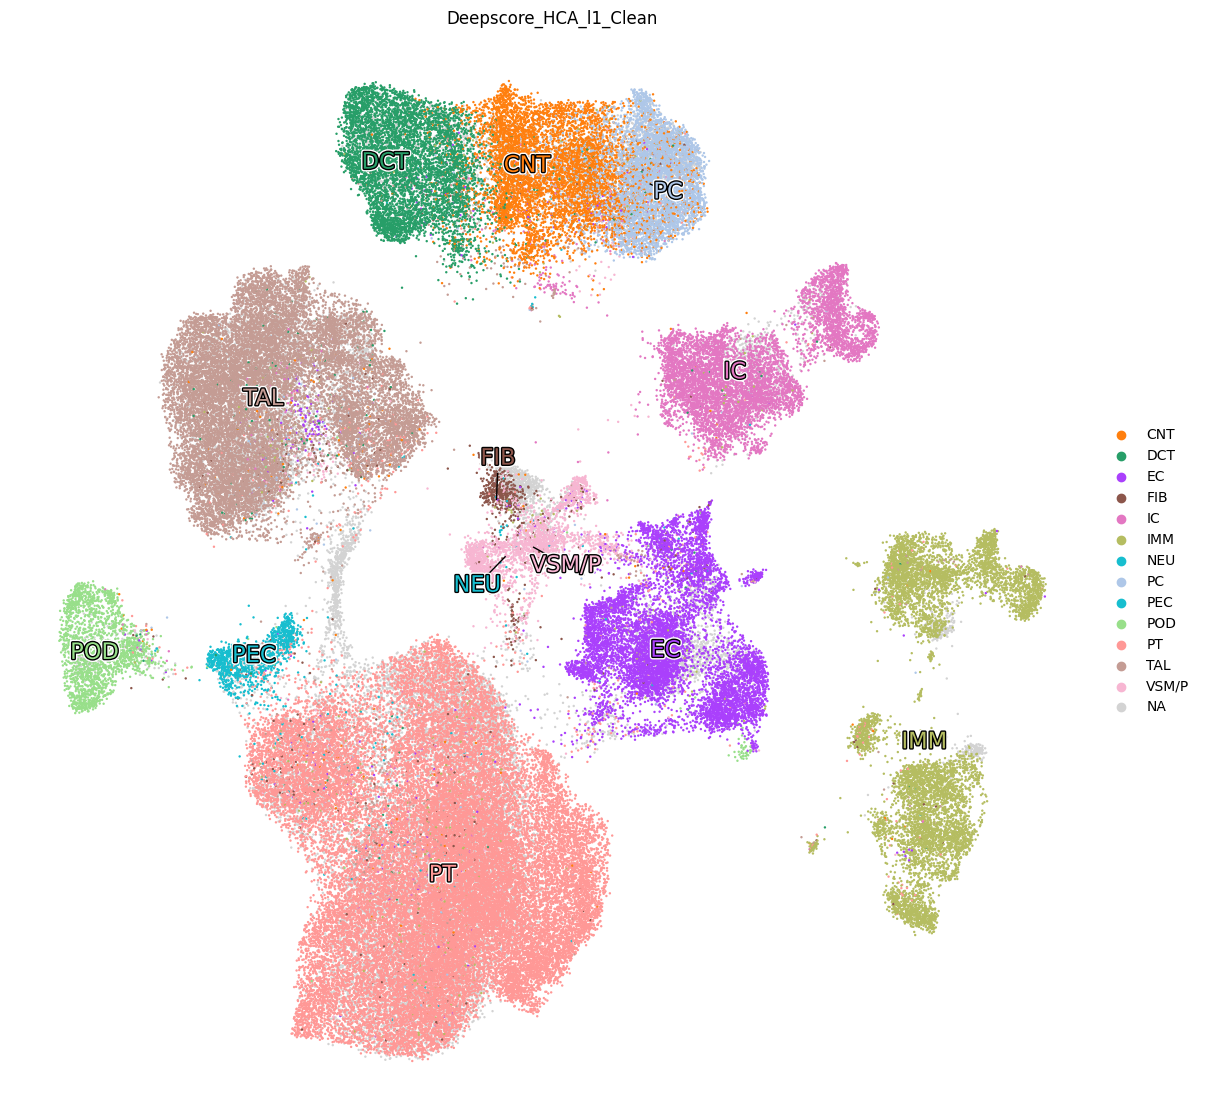

In [ ]:
for ann in ['Deepscore_HCA_l1_Clean']:
    adata.obs[ann] = adata.obs[ann].astype('category')
    adata.uns[f'{ann}_colors'] = [l1_colors[i] for i in adata.obs[ann].cat.categories]
    umap_refined(adata,
                umap = 'X_umap',
                var = ann,
                size= 12,
                label_size = 65,
                width_in_inches = 14,
                height_in_inches = 14,
                max_iterations=50)
    plt.savefig(f'figures/UMAPS/fig2_MOSAIC_{ann}_1.png',  bbox_inches='tight', dpi=300)
    plt.savefig(f'figures/UMAPS/fig2_MOSAIC_{ann}_1.pdf',  bbox_inches='tight', dpi=300)

Figure size= (14, 14) dpi= 100.0 Scale factor = 43.54494015488939


/tmp/ipykernel_10873/858591446.py:88: RuntimeWarning: invalid value encountered in divide
  norm_direction = direction / np.linalg.norm(direction)


Figure size= (14, 14) dpi= 100.0 Scale factor = 43.54494015488939


/tmp/ipykernel_10873/858591446.py:88: RuntimeWarning: invalid value encountered in divide
  norm_direction = direction / np.linalg.norm(direction)


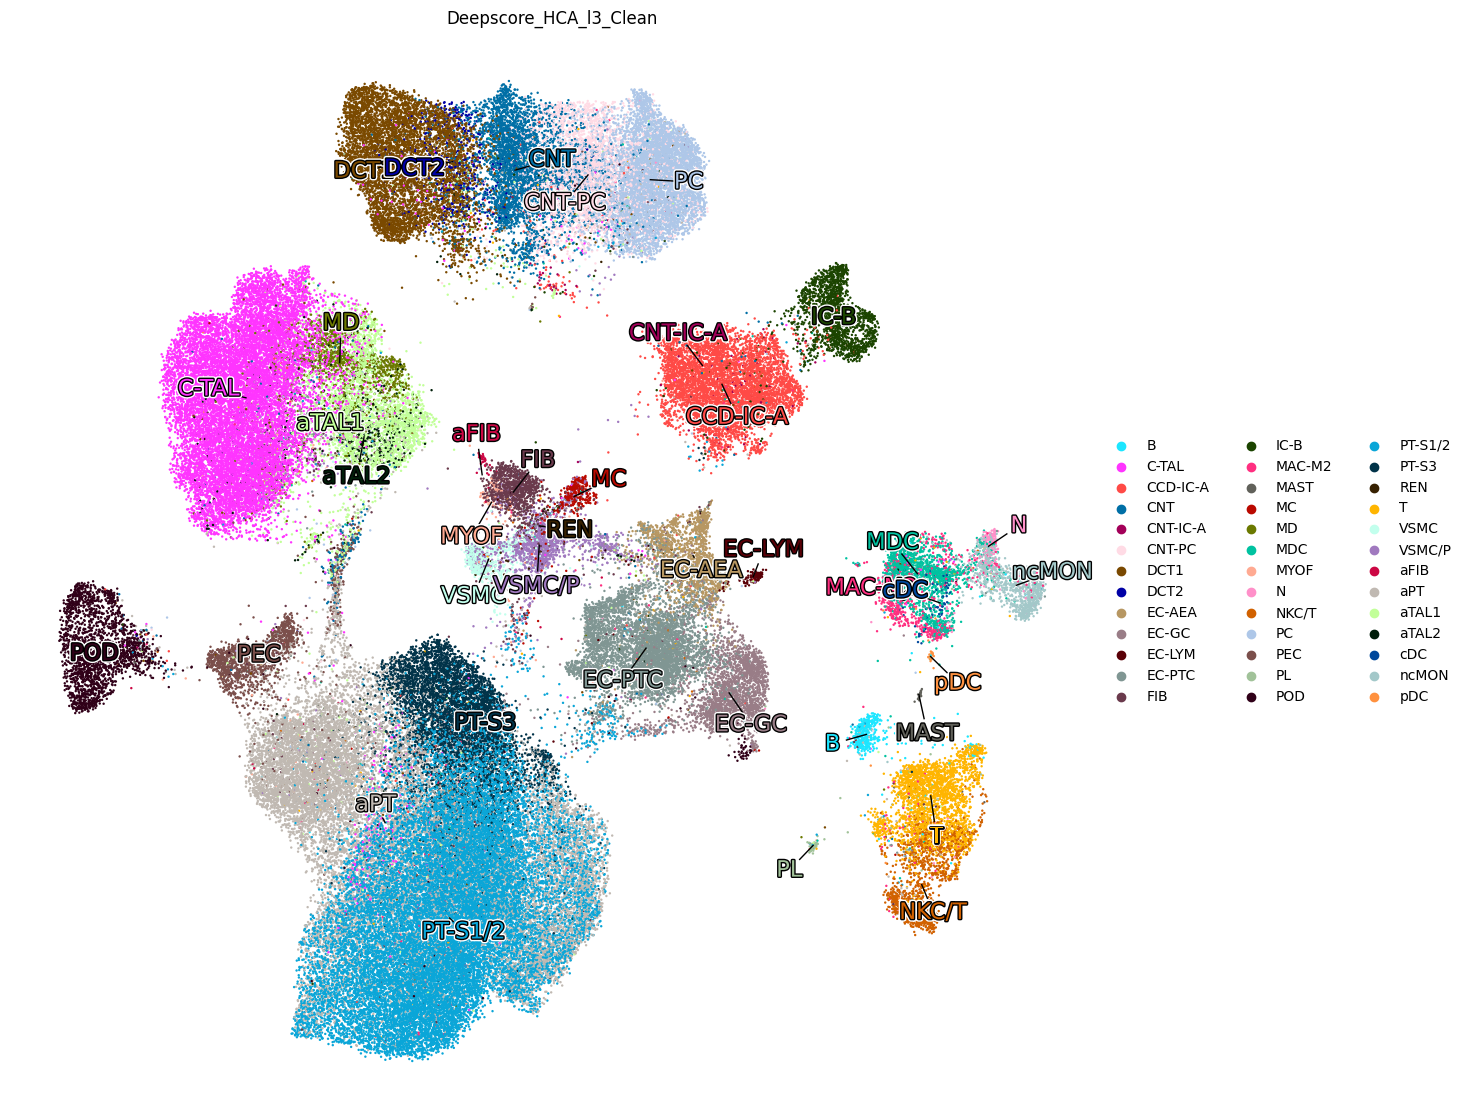

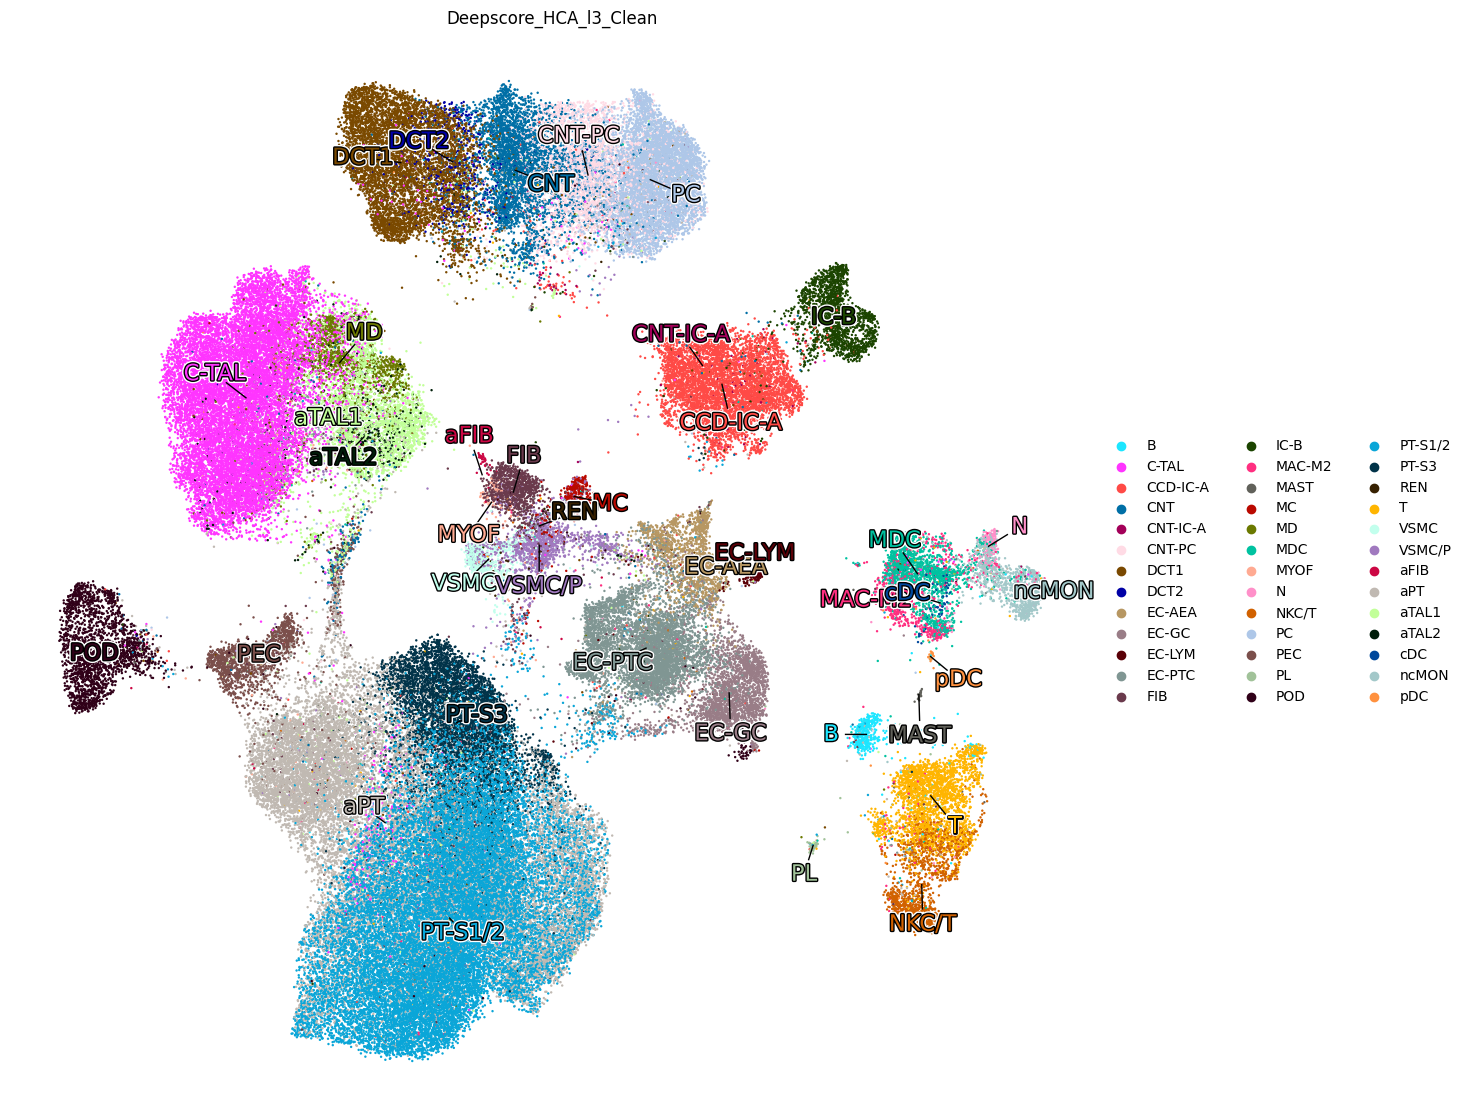

In [ ]:
for ann in ['Deepscore_HCA_l3_Clean']:
    adata.obs[ann] = adata.obs[ann].astype('category')
    adata.uns[f'{ann}_colors'] = [l3_colors[i] for i in adata.obs[ann].cat.categories]
    umap_refined(adata,
                umap = 'X_umap',
                var = ann,
                size= 12,
                label_size = 65,
                width_in_inches = 14,
                height_in_inches = 14,
                max_iterations=50)
    # plt.savefig(f'../DEEPSCORE/figures/umaps/{ann}.png',  bbox_inches='tight', dpi=300)
    plt.savefig(f'figures/UMAPS/fig2_MOSAIC_{ann}_1.png',  bbox_inches='tight', dpi=300)
    plt.savefig(f'figures/UMAPS/fig2_MOSAIC_{ann}_1.pdf',  bbox_inches='tight', dpi=300)

In [13]:
color_dict = {"scRNA 3p": '#1f77b4',
    "scRNA 5p": '#ff7f0e',
    'snRNA': '#2ca02c',
    'snATAC': '#8c564b', 
    'snMulti': '#000000',
}
rename_dict = {'scRNA': "scRNA 3p", 'scRNA5p': "scRNA 5p", 'snRNA':  'snRNA',
    'snATAC':'snATAC', 'snMulti':'snMulti',}
adata.obs['batch'] = adata.obs['batch'].replace(rename_dict)

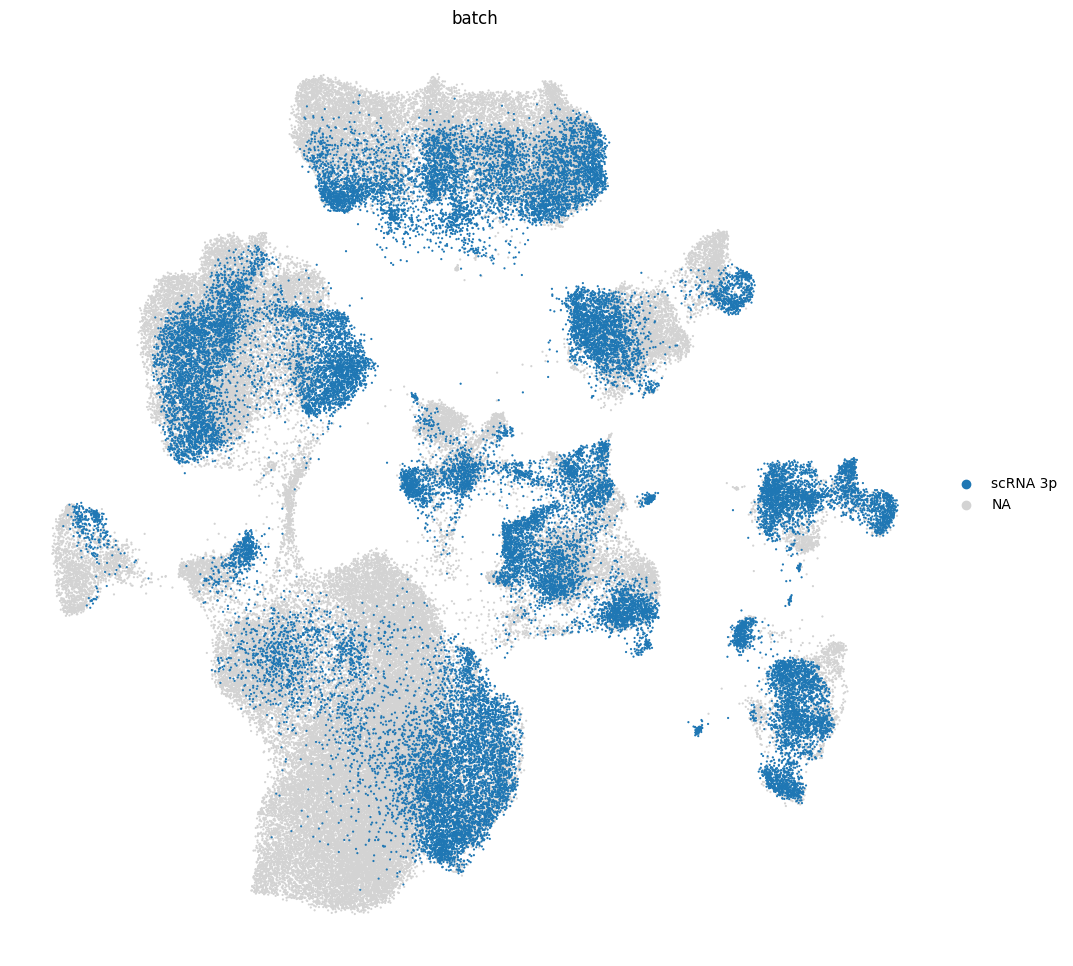

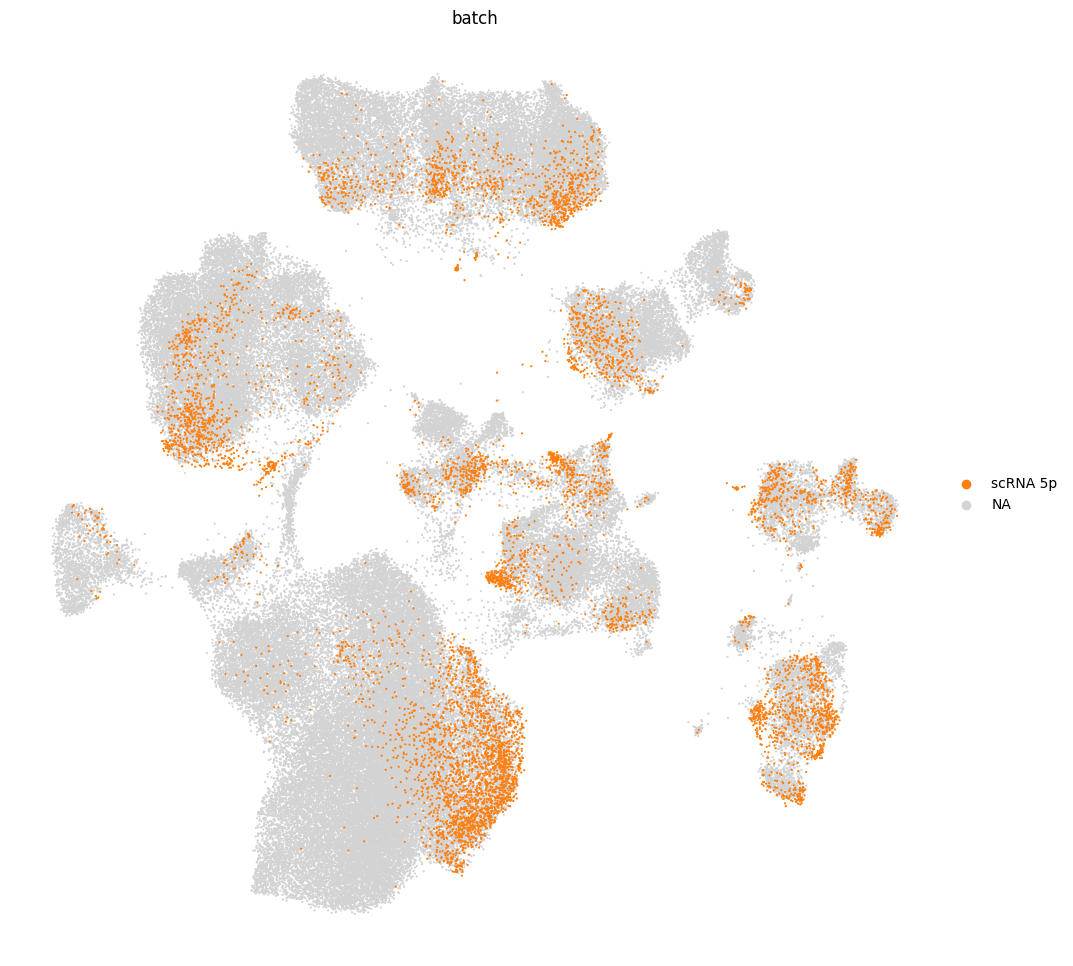

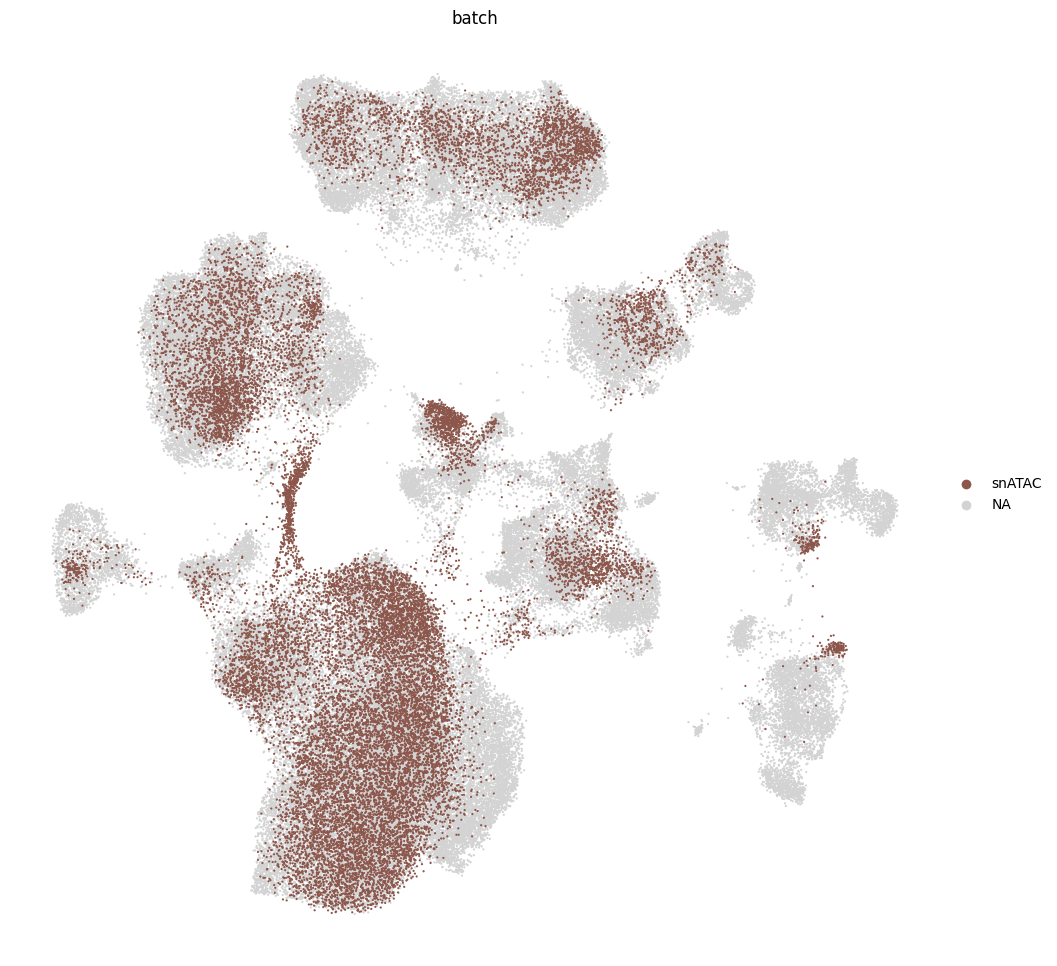

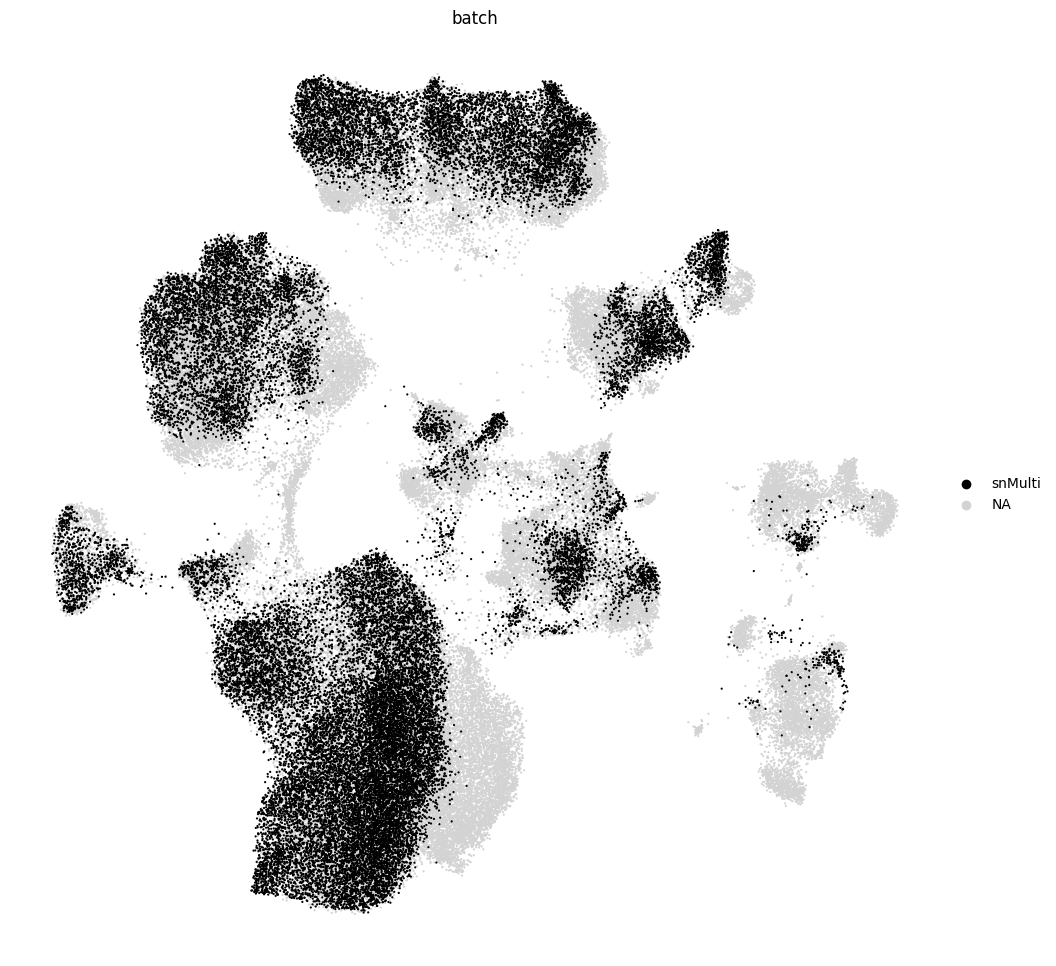

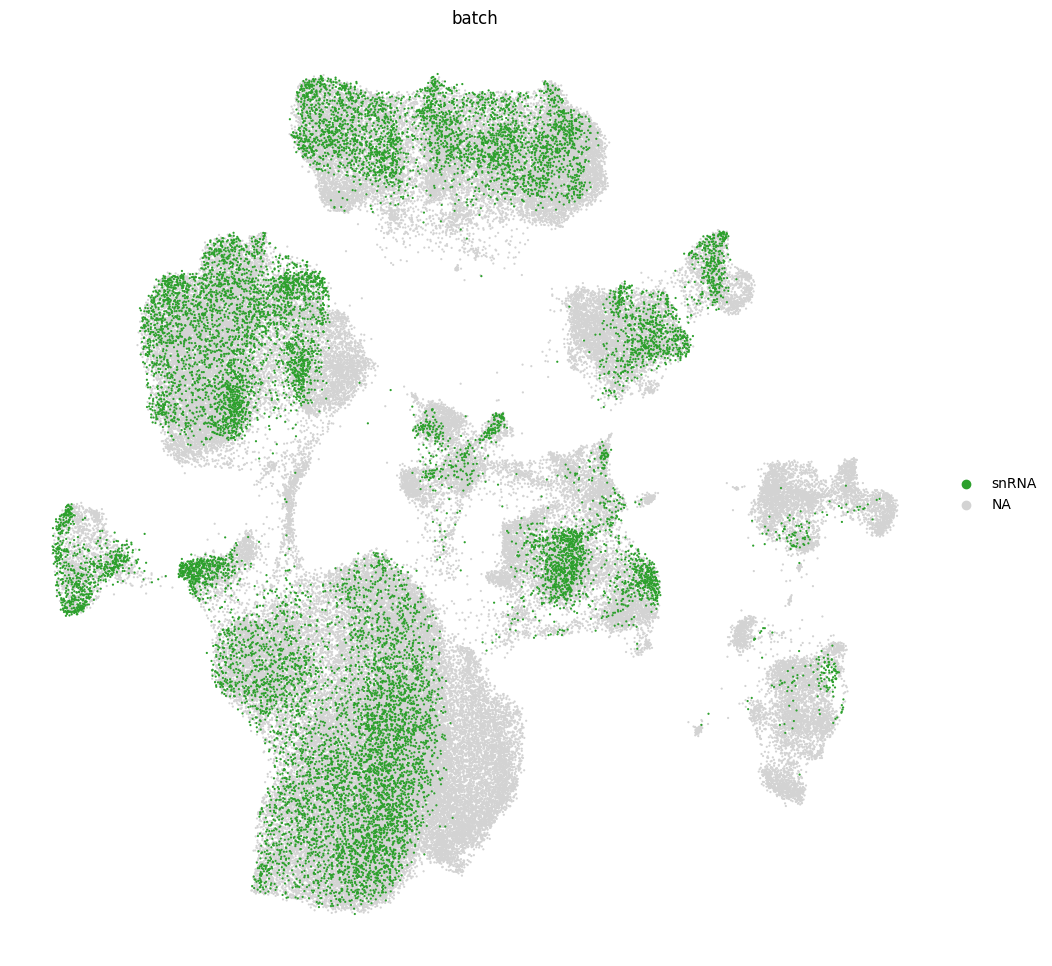

In [15]:
for batch in adata.obs['batch'].cat.categories:
    sc.pl.umap(adata, color = 'batch',palette = color_dict, size = 10,groups=[batch], frameon=False, show=False)
    # plt.savefig(f'figures/UMAPS/fig2_MOSAIC_{batch}.png',  bbox_inches='tight', dpi=300)
    # plt.savefig(f'figures/UMAPS/fig2_MOSAIC_{batch}.pdf',  bbox_inches='tight', dpi=300)

# LOAD RNA TRANSCRIPTOMIC DATA & ATAC GA 

### Contenate data treating snRNA & snATAC a fully unpaired but we propagate RNA annotations

In [ ]:
adata = sc.read('../HORIZONTAL_RNA/objects/RNA_STWG_final.h5ad')
adata.X.data

/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


array([9., 2., 6., ..., 1., 1., 1.], dtype=float32)

In [ ]:
ga = sc.read('../HORIZONTAL_ATAC/objects/GA_atac.h5ad')

/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning:

`anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.

/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning:

Variable names are not unique. To make them unique, call `.var_names_make_unique`.



In [ ]:

obs = adata.obs[adata.obs['batch']=='snRNA']
obs.index = [i.replace('-snRNA','') for i in obs.index]
ga.obs['batch'] = 'snATAC'
ga = ga[ga.obs.index.isin(obs.index)]
ga.obs['Deepscore_HCA_l1_Clean'] = obs['Deepscore_HCA_l1_Clean']
ga.obs['Deepscore_HCA_l3_Clean'] = obs['Deepscore_HCA_l3_Clean']

/tmp/ipykernel_20852/3450760330.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ga.obs['Deepscore_HCA_l1_Clean'] = obs['Deepscore_HCA_l1_Clean']
/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
ga.obs.index = [i+'-snATAC' for i in ga.obs.index]

In [ ]:
adata.obs_names_make_unique()
ga.obs_names_make_unique()

In [ ]:
adata = sc.concat([adata,ga], join='outer', axis = 0)

In [ ]:
# Drop NEU for plotting 
adata = adata[~adata.obs['Deepscore_HCA_l1_Clean'].isin(['NEU'])]

In [ ]:
adata.obs['AnnByBatch']= [str(i)+' '+str(j) for j,i in zip(adata.obs['batch'], adata.obs['Deepscore_HCA_l1_Clean'])]

/tmp/ipykernel_6906/2784653011.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['AnnByBatch']= [str(i)+' '+str(j) for j,i in zip(adata.obs['batch'], adata.obs['Deepscore_HCA_l1_Clean'])]


In [ ]:
def load_markers(adata, group_by='Deepscore_HCA_l1_Clean', reference='batch'):
    """
    Compute marker genes for each group in each batch and include the mean expression in the population.
    
    Parameters:
    adata (AnnData): The annotated data matrix.
    group_by (str): Column name to group by (typically population).
    reference (str): Column name for batch differentiation.
    
    Returns:
    dict: A dictionary of dataframes, each containing marker genes per batch, with additional mean expression data.
    """
    result = {}
    batches = adata.obs[reference].unique()
    
    for batch in batches:
        print(f"Processing batch: {batch}")
        # Subset the data by batch
        markers_df = pd.read_csv(f"markers_{batch}.csv", index_col=0)

        # Store the modified dataframe in the result dictionary
        result[batch] = markers_df
        
        # Optionally save results to CSV
    
    return result

def filter_unique_markers_by_pop_and_batch(markers_dict):
    """
    Filter markers that are unique to each batch and population, based on adjusted p-value thresholds,
    and ensure these markers are not statistically significant in other populations within the same batch.
    
    Parameters:
    markers_dict (dict): Dictionary containing dataframes of markers for each batch.
    
    Returns:
    dict: Nested dictionary with batches as keys, each containing another dictionary of populations
          with lists of unique, significantly ranked genes.
    """
    # Concatenate all markers with batch identification
    all_markers = pd.concat([df.assign(batch=batch) for batch, df in markers_dict.items()])

    # Filter for significant markers
    significant_markers = all_markers

    # Prepare the output dictionary
    unique_markers_dict = {}

    # Group data by batch
    for batch, batch_data in significant_markers.groupby('batch'):
        batch_dict = {}
        populations = batch_data['group'].unique()

        for population in populations:
            population_data = batch_data[batch_data['group'] == population]

            # Get names of genes in this population and batch
            batch_genes = population_data['names']

            # Genes in other batches
            other_batches_genes = significant_markers[
                (significant_markers['group'] == population) & (significant_markers['logfoldchanges'] > 1.5) & (significant_markers['pvals_adj']  < 0.05) &
                (significant_markers['batch'] != batch) & (significant_markers['mean_expression'] > 2.5)
            ]['names']


            other_populations_markers = []

            # Iterate over each unique population in the 'group' column
            for population_ in significant_markers['group'].unique():
                if population_ != population:
                    # Filter the DataFrame to exclude the current population and meet the other conditions
                    other_populations_genes = significant_markers[
                        (significant_markers['group'] == population_) &
                        (significant_markers['batch'] == batch) &  # Assuming 'batch' condition is static; change as needed
                        (significant_markers['mean_expression'] > 2.5)
                    ]['names']

                    # Append the results to the list
                    other_populations_markers.extend(other_populations_genes.tolist())
            print(batch, population,len(list(set(other_populations_markers))))

            # Determine unique genes
            unique_genes = batch_genes[
                ~batch_genes.isin(other_batches_genes) & # Not in other batches
                ~batch_genes.isin(other_populations_markers)  # Not in other populations within the same batch
            ].drop_duplicates()
            print(len(unique_genes))
            # Select the rows corresponding to the unique genes, sorted by significance
            unique_markers = population_data[population_data['names'].isin(unique_genes)]
            unique_markers_sorted = unique_markers.sort_values(by=['scores'], ascending=[False])

            # Store the sorted unique genes for this population
            batch_dict[population] = unique_markers_sorted['names'].tolist()

        # Store the dictionary for this batch
        unique_markers_dict[batch] = batch_dict

    return unique_markers_dict

def filter_unique_markers_by_pop(markers_dict):
    """
    Filter markers that are unique to each batch and population, based on adjusted p-value thresholds,
    and ensure these markers are not statistically significant in other populations within the same batch.
    
    Parameters:
    markers_dict (dict): Dictionary containing dataframes of markers for each batch.
    
    Returns:
    dict: Nested dictionary with batches as keys, each containing another dictionary of populations
          with lists of unique, significantly ranked genes.
    """
    # Concatenate all markers with batch identification
    all_markers = pd.concat([df.assign(batch=batch) for batch, df in markers_dict.items()])

    # Filter for significant markers
    significant_markers = all_markers

    # Prepare the output dictionary
    unique_markers_dict = {}

    # Group data by batch
    for batch, batch_data in significant_markers.groupby('batch'):
        batch_dict = {}
        populations = batch_data['group'].unique()

        for population in populations:
            population_data = batch_data[batch_data['group'] == population]

            # Get names of genes in this population and batch
            batch_genes = population_data['names']

            # # Genes in other populations within the same batch

            other_populations_markers = []
            # Iterate over each unique population in the 'group' column
            for population_ in significant_markers['group'].unique():
                if population_ != population:
                    # Filter the DataFrame to exclude the current population and meet the other conditions
                    other_populations_genes = significant_markers[
                        (significant_markers['group'] == population_) &
                        (significant_markers['batch'] == batch) &  # Assuming 'batch' condition is static; change as needed
                        (significant_markers['mean_expression'] > 1)
                    ]['names']
                    # print(len(list(set(other_populations_markers))))

                    # Append the results to the list
                    other_populations_markers.extend(other_populations_genes.tolist())
            print(len(list(set(other_populations_markers))))
            print(batch, population,'RPL39' in other_populations_markers)
            significant_genes = significant_markers[(significant_markers['group'] == population) & (significant_markers['logfoldchanges'] > 1) & (significant_markers['pvals_adj']  < 0.05)]['names']
            # Determine unique genes
            unique_genes = batch_genes[
                batch_genes.isin(significant_genes) & # Not in other batches
                ~batch_genes.isin(other_populations_markers)  # Not in other populations within the same batch
            ].drop_duplicates()
            print(len(unique_genes))
            # Select the rows corresponding to the unique genes, sorted by significance
            unique_markers = population_data[population_data['names'].isin(unique_genes)]
            unique_markers_sorted = unique_markers.sort_values(by=['scores'], ascending=[False])

            # Store the sorted unique genes for this population
            batch_dict[population] = unique_markers_sorted['names'].tolist()

        # Store the dictionary for this batch
        unique_markers_dict[batch] = batch_dict

    return unique_markers_dict


markers_dict = load_markers(adata)

unique_markers_dict = filter_unique_markers_by_pop(markers_dict)


In [ ]:
def merge_population_markers_top_n(unique_markers_dict, top_n=10):
    """
    Merge markers from all batches to have only population entries, combining the top N unique genes 
    for each population from each batch.

    Parameters:
    unique_markers_dict (dict): Nested dictionary with batches as keys, each containing another dictionary of populations
                                with lists of unique, significantly ranked genes.
    top_n (int): Number of top genes to include from each batch for each population.

    Returns:
    dict: Dictionary with populations as keys and a combined list of unique, significantly ranked genes from all batches.
    """
    population_dict = {}

    # Iterate over each batch
    for batch, populations in unique_markers_dict.items():
        print(batch)
        # Iterate over each population in the batch
        for population, genes in populations.items():
            top_genes = genes[:top_n]  # Select the top N genes from the list
            # print(population, top_genes)
            if population not in population_dict:
                population_dict[population] = top_genes  # Use a set to avoid duplicates
            else:
                population_dict[population] = population_dict[population] + (top_genes)  # Add new unique genes to the existing set for the population
    print(population_dict[population])
    # Convert sets back to sorted lists
    for population in population_dict:
        population_dict[population] = list(set(population_dict[population]))

    return population_dict

# Example usage
# Assume `unique_markers_dict` is already populated from the previous steps
top_n_genes = 10  # Specify how many top genes you want to include from each list
consolidated_populations = merge_population_markers_top_n(unique_markers_dict, top_n=top_n_genes)

### AFTER PLOT INSPECTION and MANUAL SELECTION

In [ ]:
manual_markers = { 'IC': ['CLNK',
  'RCAN2',
  'PACRG',
  'SLC26A7',
  'PDE1C'],
 'PEC': ['CFH',
  'CYP1B1',
  'SLC4A11',
  'CLDN1',
  'RHEX',
  'CTSC'],
 'PT': ['MIOX',
  'GSTA1',
  'CUBN',
  'ALDOB',
  'SLC13A3',
  'AK4',
  'SORCS1',
  'HNF4A',
  'ACSM2A'],
 'TAL': ['SLC12A1',
  'SIM2',
  'PPP1R1A',
  'CLDN16',
  'UMOD',
  'CASR'],
 'PC': ['PAPPA',
  'SLC45A4',
  'AQP2',
  'SLC7A1',
  'KSR2',
  'SLC25A29'],
 'CNT': ['CALB1',
  'FAM110B',
  'SLC8A1',
  'SCPEP1',
  'TOX3'],
 'DCT': ['CACNB4',
  'TRPM7',
  'KLHL3',
  'SLC12A3',
  'SERPINA5',
  'WNK4'],
'POD': ['PLA2R1',
  'CLIC5',
  'PTPRQ',
  'NPHS2',
  'PTPRO',
  'NPHS1'],
 'EC': ['PECAM1',
  'EMCN',
  'FLT1',
  'RNASE1',
  'PDE2A',
  'PTPRB'],
 'FIB': ['NID1',
  'CCDC80',
  'ELN',
  'NEGR1',
  'EBF1',
  'C7',
  'FBLN1'],
 'VSM/P': ['HEYL',
  'MYH11',
  'PDE3A',
  'RGS5',
  'ACTA2',
  'PLXND1',
  'COL25A1',
  'RERGL'],
 'IMM': [
  'P2RY8',
  'HCST',
  'IKZF1',
  'AOAH',
  'CORO1A',
  'CXCR4',
  'PTPRC',
  'CHST11'],}

In [ ]:
adata.obs['batch'] = adata.obs['batch'].cat.reorder_categories(['scRNA', 'scRNA5p','snRNA','snATAC'])
adata.obs['Deepscore_HCA_l1_Clean'] = adata.obs['Deepscore_HCA_l1_Clean'].cat.reorder_categories(manual_markers.keys())
ann_batch_order = []
for i in adata.obs['Deepscore_HCA_l1_Clean'].cat.categories:
    for j in adata.obs['batch'].cat.categories:
        ann_batch_order.append(str(i)+' '+str(j))

In [ ]:
adata.obs['AnnByBatch']= [str(i)+' '+str(j) for j,i in zip(adata.obs['batch'], adata.obs['Deepscore_HCA_l1_Clean'])]
adata.obs['AnnByBatch'] = adata.obs['AnnByBatch'].astype('category')
adata.obs['AnnByBatch'] = adata.obs['AnnByBatch'].cat.reorder_categories(ann_batch_order)

/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


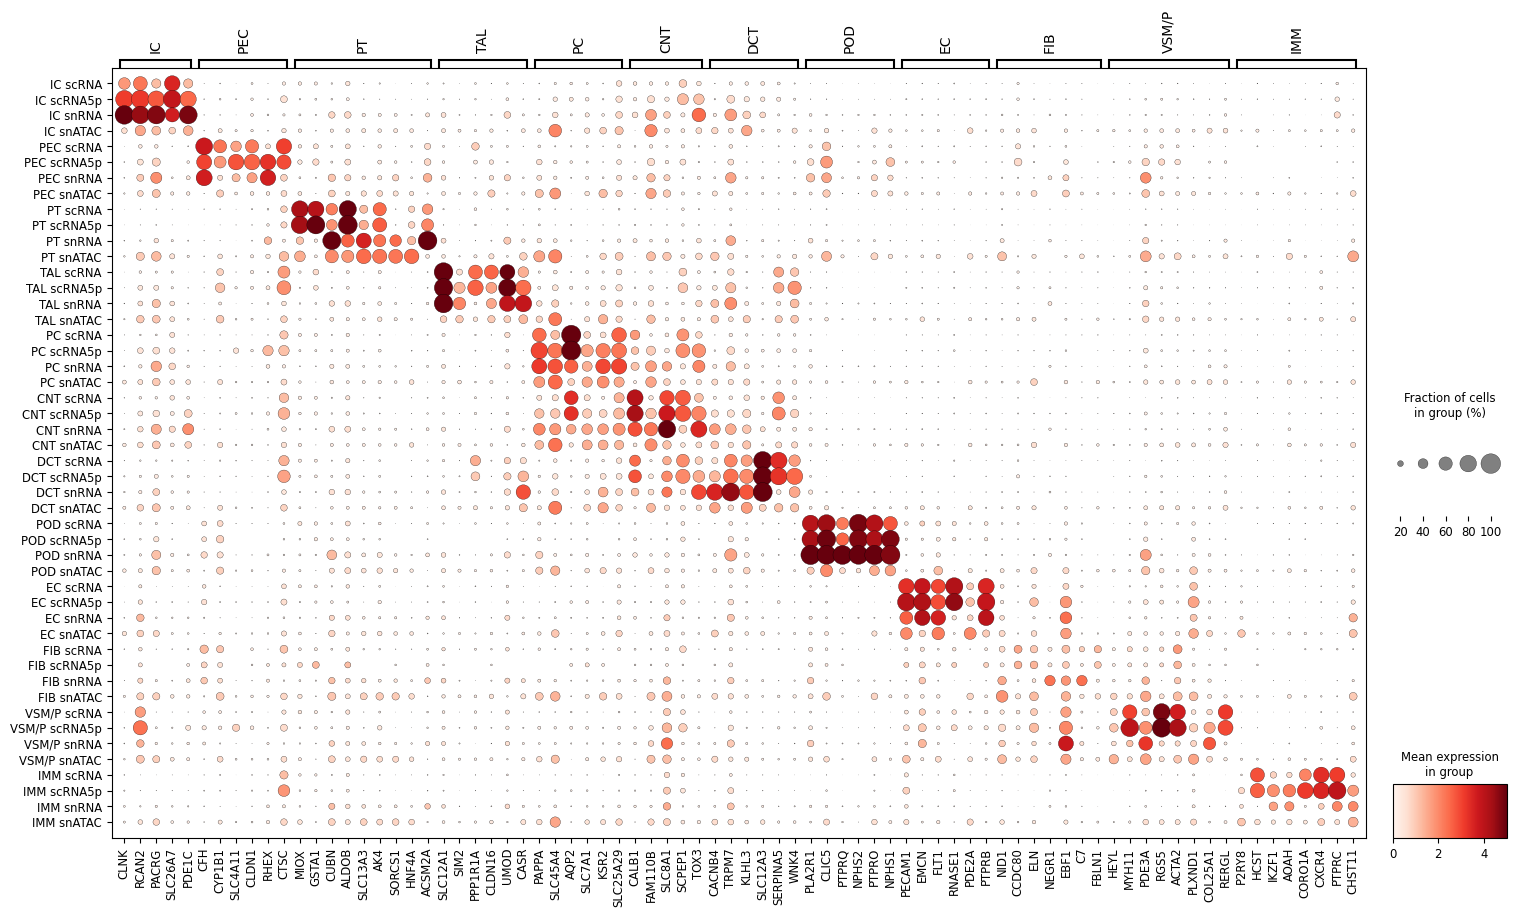

In [ ]:
sc.pl.dotplot(adata, var_names=manual_markers, groupby='AnnByBatch', show=False, layer='lognorm', vmax = 5, figsize=(18,10))
plt.savefig('figures/dotplots/Dotplot_Manual.png', dpi = 500, bbox_inches='tight')

# UPSETs plot generation

In [ ]:
celltype = ['TAL','POD',
'EC',
'IC',        
'IMM',
'PT',
'CNT',
'PC',
'DCT',
'VSM/P',
'PEC']

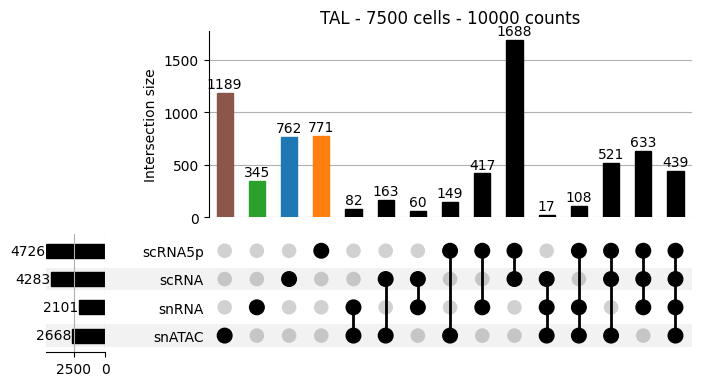

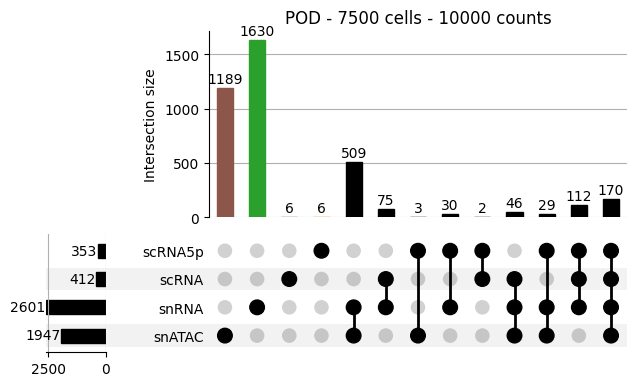

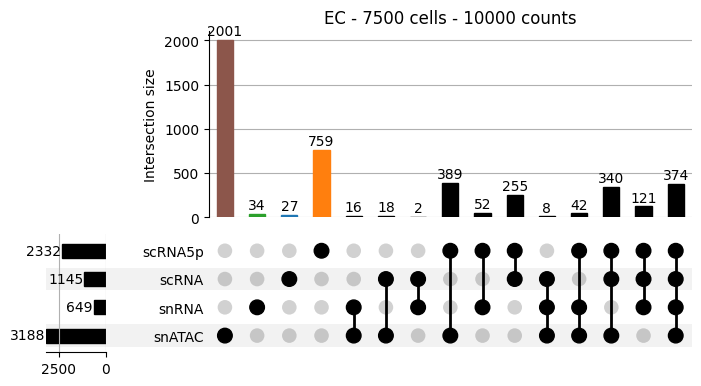

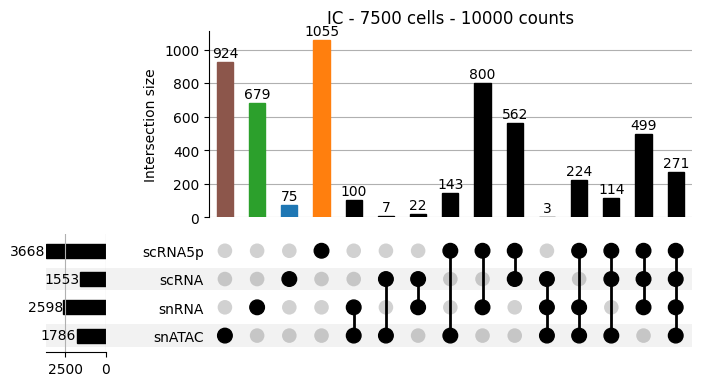

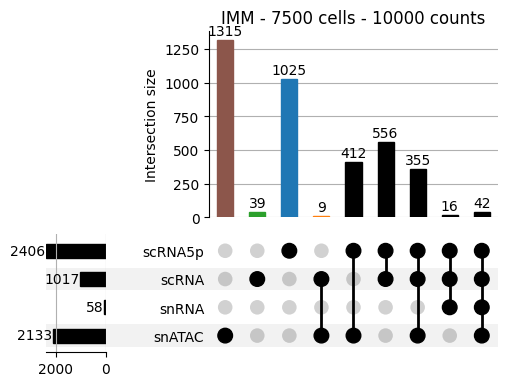

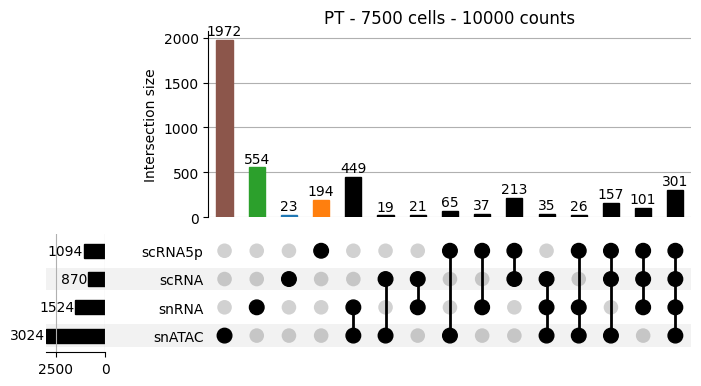

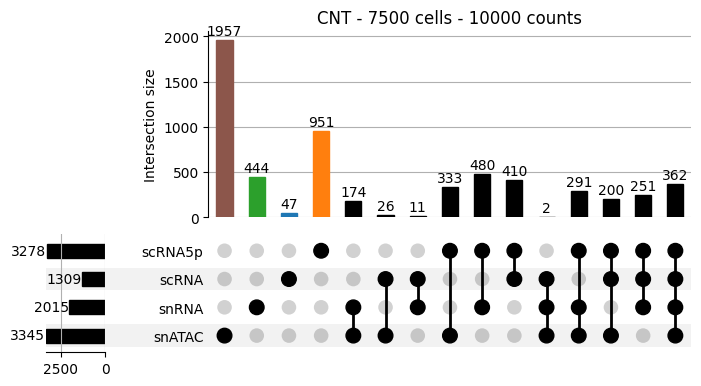

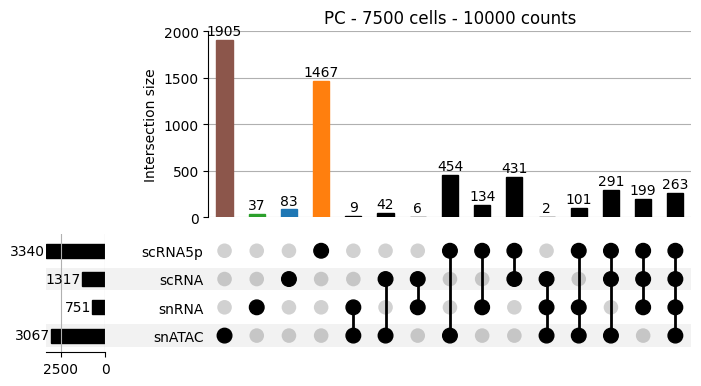

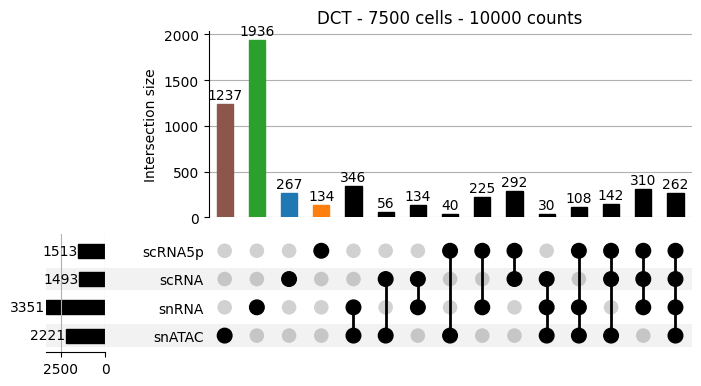

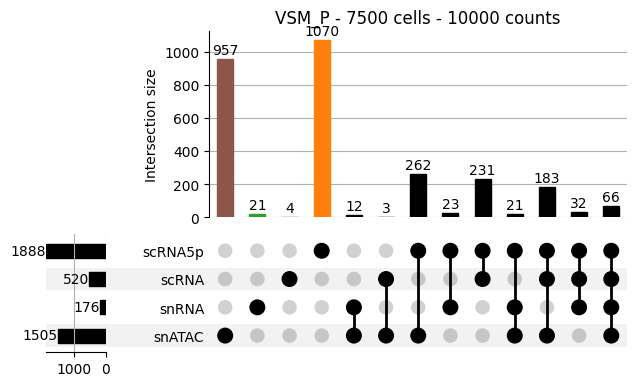

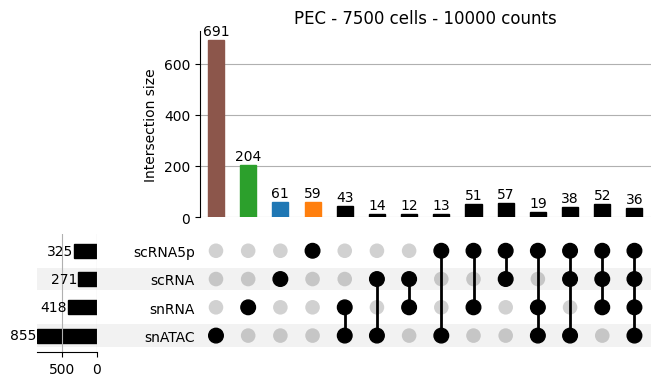

In [ ]:
## DOWNSAMPLED OBJECTS MARKERS
import os
from upsetplot import plot as upset_plot
import matplotlib.pyplot as plt
from upsetplot import from_contents, plot as upset_plot

# Assuming grouped is already calculated
color_dict = {
    "scRNA 3' Horizontal": '#1f77b4',
    "scRNA 5' Horizontal": '#ff7f0e',
    'scMultiome-RNA Horizontal': '#2ca02c',
    'scMultiome-ATAC Horizontal': '#8c564b', 
}

os.makedirs('figures/Upset_markers/downsampling', exist_ok=True)
# First loop to plots for the different runs
for i in range(1):
    # Set downsampling depth
    for counts in [10000]:#20000,15000,10000,7500,5000,3000]:
        os.makedirs(f'figures/Upset_markers/downsampling/7500cell_{counts}counts', exist_ok=True)
        for pop in celltype:
            pop_ = pop.replace('/','_')

            data = {}

            # FOR UPSET PLOTS INCLUDING Smart-seq
            # if pop != 'PEC':
            #     markers_df = pd.read_csv(f'../SmartSeq/csv/DEG/downsampling/markers_{counts}counts_run{i}_.csv', index_col=0)
            #     if pop in ['CNT','DCT','PC']:
            #         pop_ss = 'DCT-CNT-PC'
            #     else:
            #         pop_ss=pop
            #     markers_df = markers_df[markers_df['group']==pop_ss]
            #     markers_df = markers_df[markers_df['logfoldchanges']>0.25]
            #     markers_df = markers_df[markers_df['pvals_adj']<0.05]

            #     data['Smart-seq2'] = markers_df['names']


            atac_csv = f"../HORIZONTAL_ATAC/DAR/DAR/csv/l1/DAG_overlap_{pop_}.csv"
            markers_df = pd.read_csv(atac_csv, index_col=0)
            quantile_threshold = 0.8
            # Filter the DataFrame to select rows where 'average_score' is above the cutoff value
            cutoff_value = markers_df['average_score'].quantile(quantile_threshold)

            markers_df = markers_df[markers_df['average_score'] > cutoff_value]
            data['snATAC'] = list(markers_df.index)

            for batch in ['snRNA', 'scRNA', 'scRNA5p']:
                markers_df = pd.read_csv(f'../HORIZONTAL_RNA/DEG/downsampling/markers_{batch}_7500cells_{counts}counts_run{i}_.csv', index_col=0)
                markers_df = markers_df[markers_df['group']==pop]
                markers_df = markers_df[markers_df['logfoldchanges']>0.25]
                markers_df = markers_df[markers_df['pvals_adj']<0.05]

                data[batch] = markers_df['names']

            original_dict=data
            value_count = {}

            for key, values in original_dict.items():
                for value in values:
                    if value in value_count:
                        value_count[value] += 1
                    else:
                        value_count[value] = 1

            # Create a new dictionary with only unique values for each key
            unique_values_dict = {}
            for key, values in original_dict.items():
                unique_values = [value for value in values if value_count[value] == 1]
                unique_values_dict[key] = unique_values
            
            unique_values_dict
            # Save to CSV
            df_unique_features = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in unique_values_dict.items() ]))
            df_unique_features.to_csv(f'../HORIZONTAL_RNA/DEG/downsampling/unique/{counts}counts_{pop_}_run{i}_.csv', index=False)

            # Save to CSV
            df_unique_features.to_csv(f'../HORIZONTAL_RNA/DEG/downsampling/unique/{counts}counts_{pop_}_run{i}_.csv', index=False)

            upset_data = from_contents(data)
            axes = upset_plot(upset_data, sort_by='degree', sort_categories_by='input',element_size=30,min_subset_size=2, orientation='horizontal', show_counts=True, with_lines=True)

            # Access the axes to customize
            # if pop == 'PEC':
            for n,bar in enumerate(axes['intersections'].patches):
                # Custom color conditions (you can use your own logic here)
                if n==2:  # Example condition for changing bar color
                    bar.set_color('#1f77b4')
                elif n==3:
                    bar.set_color('#ff7f0e')
                elif n==1:
                    bar.set_color('#2ca02c')
                elif n==0:
                    bar.set_color('#8c564b')
                    # elif n==0:
                    #     bar.set_color('#FF0000')

            # Add lines manually if needed (if the automatic 'with_lines' is not enough)
            if axes.get('matrix'):
                matrix_ax = axes['matrix']
                for patch in matrix_ax.patches:
                    # Logic to draw lines, you need to define how you determine which dots to connect
                    pass
            plt.title(f'{pop_} - 7500 cells - {counts} counts')
            plt.savefig(f'figures/Upset_markers/downsampling/7500cell_{counts}counts/{pop_}_{i}.png', dpi=600, bbox_inches='tight')
            plt.savefig(f'figures/Upset_markers/downsampling/7500cell_{counts}counts/{pop_}_{i}.pdf', dpi=600, bbox_inches='tight', format ='pdf')
            plt.show()